<a href="https://colab.research.google.com/github/adrianpychan/personalprojects/blob/main/Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment - Binary Image Classification of Daisies and Roses Using CNN**

## **1. Data Acquisition**
**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

**Downloading a dataset**

In [ ]:
# Run this piece of code to download the dataset
! git clone https://github.com/PrefaceCoding/Daisies-Roses_Images

Cloning into 'Daisies-Roses_Images'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 3699 (delta 1), reused 11 (delta 0), pack-reused 3687
Receiving objects: 100% (3699/3699), 224.05 MiB | 26.74 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### **Setting up DataFrames**

We will need two dataframes - one for the training set, one for the test set

In [ ]:
#Import the os package, from which, load in the listdir function
from os import listdir

#Create a dataframe that has
# -> a columns showing the file name of each image in the flower_photos/train folder
# -> and a columns indicating the image's category
daisy_train = "Daisies-Roses_Images/flower_photos/train/daisy/" 
roses_train = "Daisies-Roses_Images/flower_photos/train/roses/"

daisy_1 = listdir(daisy_train) 
roses_1 = listdir(roses_train)

train_df = pd.DataFrame(daisy_1 + roses_1, columns = ["Image Name"])
train_df["Category"] = "TBC"

for i in range(0,(len(daisy_1))):
  train_df["Category"][i] = "daisy"
  train_df.loc[train_df["Category"].str.contains('TBC', case=False, na = False), "Category"] = "roses"

#Create another dataframe that has
# -> a columns showing the file name of each image in the flower_photos/test folder
# -> and a columns indicating the image's category
daisy_test = "Daisies-Roses_Images/flower_photos/test/daisy/" 
roses_test = "Daisies-Roses_Images/flower_photos/test/roses/"

daisy_2 = listdir(daisy_test) 
roses_2 = listdir(roses_test)

test_df = pd.DataFrame(daisy_2 + roses_2, columns = ["Image Name"])
test_df["Category"] = "TBC"

for i in range(0,(len(daisy_2))):
  test_df["Category"][i] = "daisy"
  test_df.loc[test_df["Category"].str.contains('TBC', case=False, na = False), "Category"] = "roses"

In [ ]:
train_df

,Image Name,Category
0,2473825306_62fd5f8785_n.jpg,daisy
1,4865691548_00319261b8.jpg,daisy
2,43474673_7bb4465a86.jpg,daisy
3,8085329197_41d53a21e2_n.jpg,daisy
4,3637428148_a1dcccafa9_n.jpg,daisy
...,...,...
961,18584002386_cec0df537d_n.jpg,roses
962,7455236056_b6d71a8dab.jpg,roses
963,17040847367_b54d05bf52.jpg,roses
964,4279989256_9a48c0d194_n.jpg,roses


In [ ]:
test_df

,Image Name,Category
0,11870378973_2ec1919f12.jpg,daisy
1,10391248763_1d16681106_n.jpg,daisy
2,14921511479_7b0a647795.jpg,daisy
3,14354051035_1037b30421_n.jpg,daisy
4,15029936576_8d6f96c72c_n.jpg,daisy
...,...,...
303,1461381091_aaaa663bbe_n.jpg,roses
304,1757822526_fe30b9b3ca_m.jpg,roses
305,873660804_37f5c6a46e_n.jpg,roses
306,466486216_ab13b55763.jpg,roses


In [ ]:
train_df["Category"].value_counts()

roses    513
daisy    453
Name: Category, dtype: int64

In [ ]:
test_df["Category"].value_counts()

daisy    180
roses    128
Name: Category, dtype: int64

## **2. Sample Image**

daisy


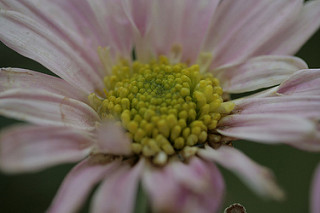

In [ ]:
# Randomly take out a filename from the train folder

random = np.random.choice(len(train_df))
path = f'Daisies-Roses_Images/flower_photos/train/{train_df["Category"][random]}/{train_df["Image Name"][random]}'

# show category of the flower

print(train_df["Category"][random])

# Load the image
import tensorflow as tf
sample= tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest')
sample

## **3. Model Building & Training**

### **Creating and Training the Model**

We can build the neural network and train and evaluate the model with data in the feature layer. In the code below we are building one of the most common types of models called a **sequential model**. This is a stack of layers starting with the feature layer.

**i) Importing a model**

In [ ]:
from keras.models import Sequential
model = Sequential()

**ii) Instantiation**

In [ ]:
from keras.layers import Flatten
from keras.layers import Dense

**iii) Adding Layers**

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D

Step 1 - Convolution Layer

In [ ]:
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (128,128,3), activation="relu", kernel_initializer="he_uniform"))
model.add(MaxPool2D(pool_size = (2,2))) #pooling

Step 2 - Pooling Layer
- Reducing the size of the images as much as possible

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Adding a second convolutional layer
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (128,128,3), activation="relu", kernel_initializer="he_uniform"))
model.add(MaxPool2D(pool_size = (2,2))) #pooling

Step 3 - Flatten Layer
- Converting all the pooled images into a continuous vector

In [ ]:
model.add(Flatten())

Step 4 - Fully Connected Layer (Hidden Layer)

- Connecting the set of nodes got after the flattening step

In [ ]:
model.add(Dense(units = 128, activation = "relu", kernel_initializer="he_uniform"))

Step 5 - Output Layer

In [ ]:
model.add(Dense(1, activation = "sigmoid"))

**iv) Compiling the model**

In [ ]:
from keras.optimizers import Adam

In [ ]:
ad = Adam(lr = 0.001)
model.compile(optimizer=ad, loss = "binary_crossentropy", metrics = ["accuracy"])

**v) Image augmentations**
- Synthesising the training data

In [ ]:
training_set = train_datagen.flow_from_directory('Daisies-Roses_Images/flower_photos/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = "binary")

Found 966 images belonging to 2 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory("Daisies-Roses_Images/flower_photos/test",
                                               target_size = (128,128),
                                               batch_size = 32,
                                               class_mode = "binary")

Found 308 images belonging to 2 classes.


**vi) Model fitting**
- Fitting the CNN to the images

In [ ]:
model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs = 10, 
                    validation_data= testing_set, validation_steps = len(testing_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
31/31 [==============================] - 22s 681ms/step - loss: 1.5544 - accuracy: 0.5827 - val_loss: 0.5040 - val_accuracy: 0.7403
Epoch 2/10
31/31 [==============================] - 21s 665ms/step - loss: 0.4044 - accuracy: 0.8118 - val_loss: 0.4009 - val_accuracy: 0.8506
Epoch 3/10
31/31 [==============================] - 21s 666ms/step - loss: 0.3903 - accuracy: 0.8091 - val_loss: 0.4154 - val_accuracy: 0.8214
Epoch 4/10
31/31 [==============================] - 21s 665ms/step - loss: 0.3459 - accuracy: 0.8522 - val_loss: 0.4995 - val_accuracy: 0.7208
Epoch 5/10
31/31 [==============================] - 21s 664ms/step - loss: 0.3507 - accuracy: 0.8550 - val_loss: 0.4004 - val_accuracy: 0.8214
Epoch 6/10
31/31 [==============================] - 21s 666ms/step - loss: 0.4104 - accuracy: 0.8068 - val_loss: 0.4273 - val_accuracy: 0.8149
Epoch 7/10
31/31 [==============================] - 21s 680ms/step - loss: 0.3290 - accuracy: 0.8508 - val_loss: 0.3749 - val_accuracy: 0.8539

## **4. Model Prediction & Evaluation**

### **Prediction**

The category is roses
The prediction is daisy


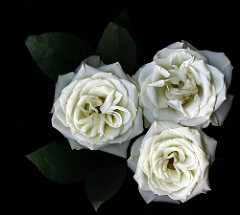

In [ ]:
# Randomly choose one image from the folder

random_number = np.random.choice(len(test_df))
predict_path = f'Daisies-Roses_Images/flower_photos/test/{test_df["Category"][random_number]}/{test_df["Image Name"][random_number]}'

# Get category of the flower through the dataframe

print(f'The category is {test_df["Category"][random_number]}')

# prepare the image to be sent into the model by converting its resolution to 128x128 as the model only accepts that resolution.

from PIL import Image
im = Image.open(predict_path)
img = im.resize((128, 128), Image.ANTIALIAS)

# expanding dimension

flower_img = np.expand_dims(img, axis = 0) 

# predicting result in 0 and 1

model.predict(flower_img)[0][0]

# show the predicted result and actual result in category
# 1: roses
# 0: daisy

if model.predict(flower_img)[0][0]==1:
  prediction = "roses"
else:
  prediction = "daisy"

print(f'The prediction is {prediction}')

# Load the image
tf.keras.preprocessing.image.load_img(
    predict_path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest')

### **Evaluation**

In [ ]:
loss, acc = model.evaluate_generator(testing_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
loss

0.3592859208583832

In [ ]:
acc

0.850649356842041